# this notebook is for Week4-Assignment-Part 1 Trp-Cage Analysis
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# Assignment: Make well labeled plots of end-end distance and radius of gyration vs time for this production trajectory

In [3]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# load the trajectory
xtc_file='../Data/Trp-Cage_center.xtc'
gro_file='../Data/Trp-Cage_center.gro'
traj=md.load(xtc_file,top=gro_file)
# check the simulation time in ns & the number of frames
print('The simulation time is',traj.time[-1]/1000,'ns')
print('The number of frames is',traj.n_frames)
# check topology (whether the solvents are removed)
print(traj.topology)
# print the number of non-hydrogen atoms with topology selection
print('The number of non-hydrogen atoms is',traj.topology.select('not element H').shape[0])

The simulation time is 10.0 ns
The number of frames is 1010
<mdtraj.Topology with 1 chains, 20 residues, 284 atoms, 265 bonds>
The number of non-hydrogen atoms is 148


In [13]:
# remove extra frames with timestamp 0 (except the first frame)
traj=traj[0]+traj[traj.time!=0]
# check the simulation time in ns & the number of frames
print('The simulation time is',traj.time[-1]/1000,'ns')
print('The number of frames is',traj.n_frames)
print(traj.time[100:200])


The simulation time is 10.0 ns
The number of frames is 1001
[10000.   100.   200.   300.   400.   500.   600.   700.   800.   900.
  1000.  1100.  1200.  1300.  1400.  1500.  1600.  1700.  1800.  1900.
  2000.  2100.  2200.  2300.  2400.  2500.  2600.  2700.  2800.  2900.
  3000.  3100.  3200.  3300.  3400.  3500.  3600.  3700.  3800.  3900.
  4000.  4100.  4200.  4300.  4400.  4500.  4600.  4700.  4800.  4900.
  5000.  5100.  5200.  5300.  5400.  5500.  5600.  5700.  5800.  5900.
  6000.  6100.  6200.  6300.  6400.  6500.  6600.  6700.  6800.  6900.
  7000.  7100.  7200.  7300.  7400.  7500.  7600.  7700.  7800.  7900.
  8000.  8100.  8200.  8300.  8400.  8500.  8600.  8700.  8800.  8900.
  9000.  9100.  9200.  9300.  9400.  9500.  9600.  9700.  9800.  9900.]


(array([0.0995, 0.1   , 0.1005, 0.101 , 0.1015, 0.102 , 0.1025, 0.103 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

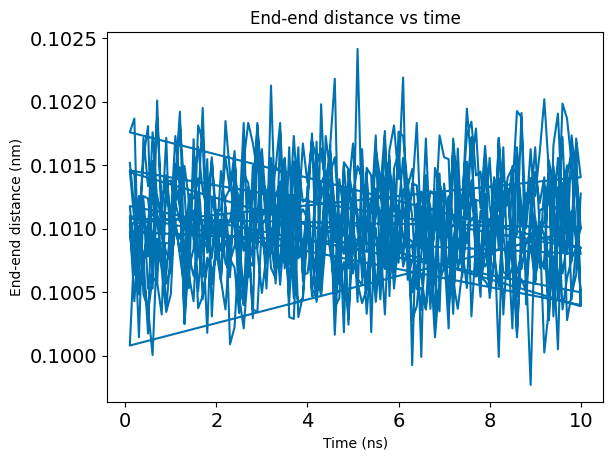

In [34]:
# figure 1: end-end distance vs time
# calculate the end-end distance
end_end_dist=md.compute_distances(traj,[[0,1]])
# plot the end-end distance vs time, colorblind-friendly
plt.figure(1)
plt.plot(traj.time/1000,end_end_dist,color='#0072B2')
# set the axis labels
plt.xlabel('Time (ns)')
plt.ylabel('End-end distance (nm)')
plt.title('End-end distance vs time')
# modify the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# set limits for the axes
#plt.xlim(0,10)
#plt.ylim(0,1.5)




In [37]:
np.where(traj.time == 10000)

(array([ 99, 199, 299, 399, 499, 599, 699, 799, 899, 999], dtype=int64),)